Mean Absolute Error (MAE): 19.300434782608693
Mean Squared Error (MSE): 768.056252173913
Root Mean Squared Error (RMSE): 27.713827815260615
R-squared (R2): 0.4859745772956219


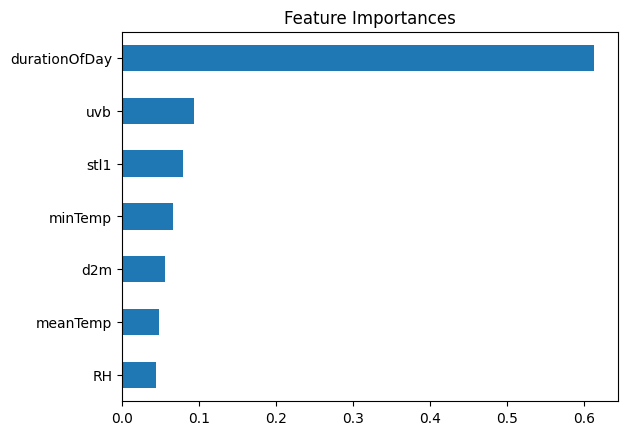

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_excel('mun.xlsx')
df = df.drop(['date', 'longitude', 'latitude', 'sunset', 'sunrise'], axis=1)

df2 = pd.read_excel('Fix.xlsx')
df2 = df2.drop([0])

# Selecting features and target variable
X = df.iloc[:, [0, 2, 5, 6, 7, 9, 11]]
y = df2.iloc[:, -4].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train.astype(float), y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R2):', r2)

# Feature importances plot
model_ranks = pd.Series(model.feature_importances_, index=X_train.columns, name="Importance").sort_values()
ax = model_ranks.plot(kind='barh')
plt.title("Feature Importances")
plt.show()


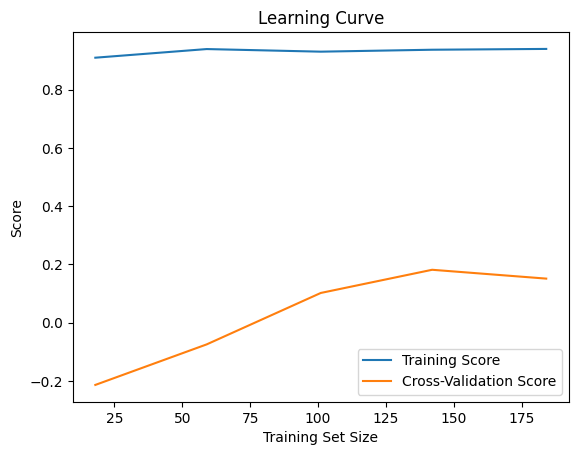

In [6]:
# Plot Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()